In [6]:
import matplotlib.pyplot as plt
import os
import numpy as np
from numpy.linalg import inv

In [7]:
os.chdir(r'C:\a_sem_i\ZM\projekt_4')

In [20]:
ID,X2000,Y2000,LOS_asc,LOS_desc,INC_asc,INC_des,d_Alfa = np.loadtxt('InSAR_dane.txt', skiprows=1,delimiter='; ', unpack=True)

dek = np.zeros((2,1))
for i in range(len(LOS_asc)):
    A = np.vstack((np.hstack((np.cos(INC_asc[i]), np.sin(INC_asc[i])/(np.cos(d_Alfa[i])))), np.hstack((np.cos(INC_des[i]), np.sin(INC_des[i])))))
    dd = np.vstack((LOS_asc[i], LOS_desc[i]))
    d = (inv(A)@dd)
    dek = np.hstack((dek,d))
    
np.savetxt('dekompozycja.txt', dek[:,1:])
    
vertical = dek[0,1:]
ALD = dek[1,1:]

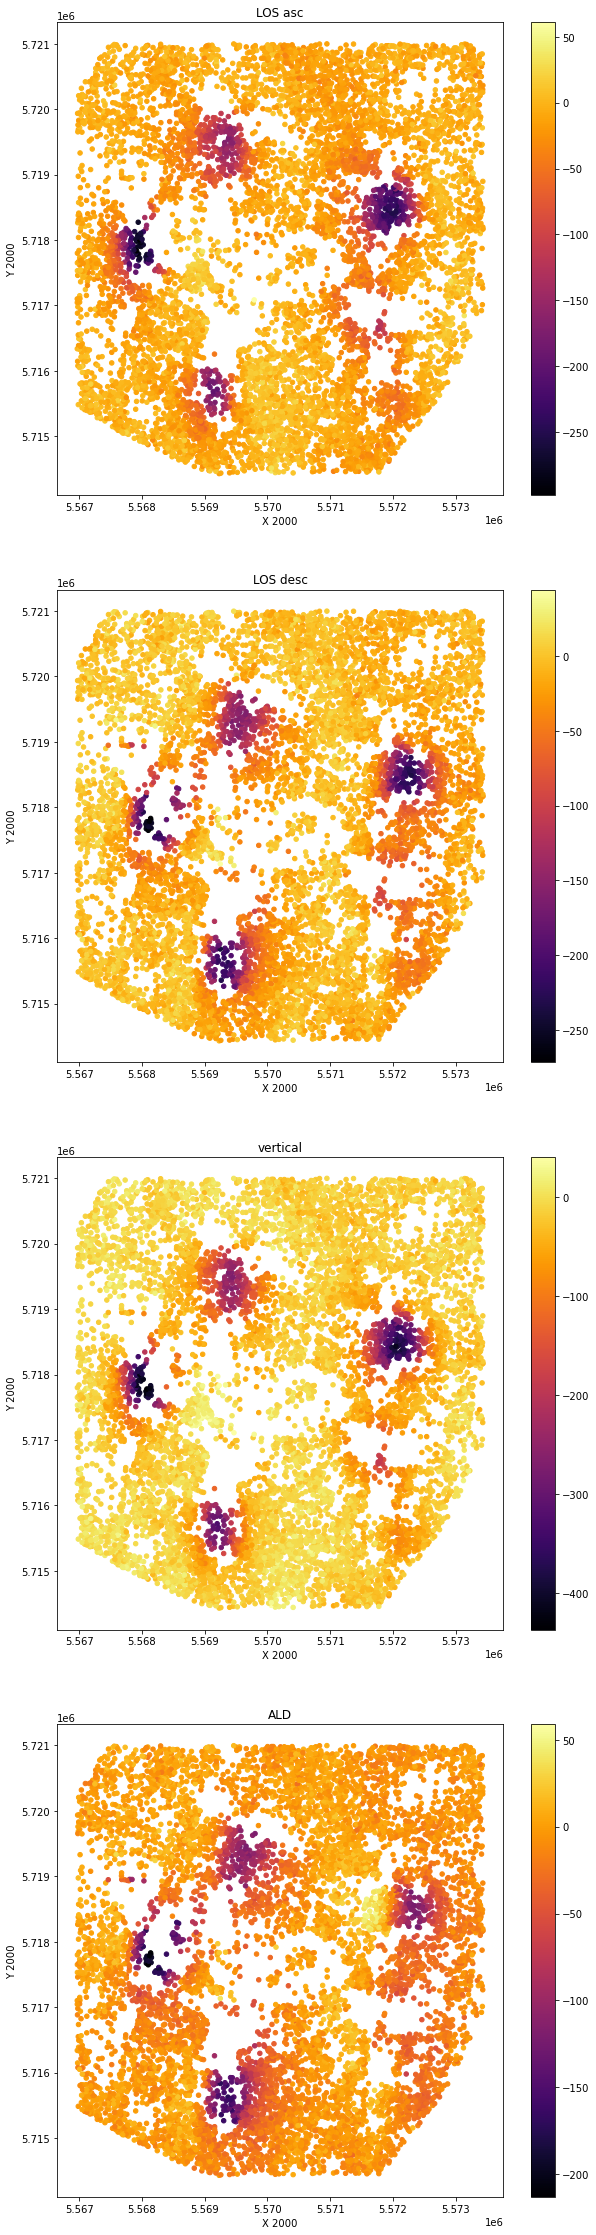

In [9]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize = (10,40))
axs = [ax1, ax2, ax3, ax4]
value = [LOS_asc,LOS_desc,vertical,ALD]
name = ['LOS asc','LOS desc','vertical','ALD']

for i, name, axi in zip(value, name, axs):
    axi.set_title(name)
    axi.set_xlabel('X 2000')
    axi.set_ylabel('Y 2000')
    pcm = axi.scatter(X2000,Y2000, s=20,c = i, cmap = 'inferno')

    fig.colorbar(pcm, ax=axi)

plt.savefig('wizualizacja.png', dpi = 200)    
plt.show()